In [75]:
import pandas as pd
import seaborn as sns

In [113]:
import matplotlib.pyplot as plt

In [115]:
%matplotlib inline

In [38]:
df = pd.read_csv("C:\\Users\\gjawa\\Documents\\TechnoGeeks\\Study Material\\5. Support-Vector-Machines\\Social_Network_Ads.csv")

In [47]:
df.head()

,Age,EstimatedSalary,Gender
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [40]:
Y = df['Purchased']

In [41]:
df.drop(['User ID', 'Purchased'], axis=1, inplace=True)

In [48]:
X = df[:]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [44]:
new_sex = pd.get_dummies(df['Gender'], drop_first=True)

In [45]:
df.drop('Gender', axis=1, inplace=True)

In [46]:
df['Gender'] = new_sex

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [52]:
Y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(confusion_matrix(Y_test, Y_pred))

[[75  4]
 [ 7 34]]


In [57]:
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93        79
          1       0.89      0.83      0.86        41

avg / total       0.91      0.91      0.91       120



In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
classifier = DecisionTreeClassifier()

In [61]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
print(confusion_matrix(Y_test, y_pred))

[[72  7]
 [ 9 32]]


In [64]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90        79
          1       0.82      0.78      0.80        41

avg / total       0.87      0.87      0.87       120



In [111]:
df_loan = pd.read_csv("C:\\Users\\gjawa\\Documents\\TechnoGeeks\\loan_data.csv")

In [112]:
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [98]:
df_loan['credit.policy'].nunique()

2

In [71]:
new_purppose = pd.get_dummies(df_loan['purpose'])

In [73]:
new_purppose.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


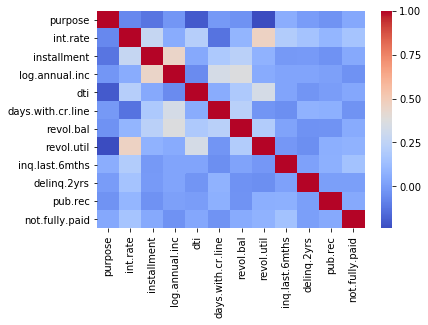

In [109]:
sns.heatmap(df_loan.corr(), cmap='coolwarm')

In [100]:
df_loan['purpose'] = pd.Categorical(df_loan['purpose'], categories=df_loan['purpose'].unique()).codes

In [101]:
df_loan['purpose'].nunique()

7

In [104]:
df_loan.drop(['credit.policy'], axis=1, inplace=True)

In [103]:
Y_loan = df_loan['credit.policy']

In [105]:
X_loan = df_loan[:]

In [108]:
X_loan.head()

,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0
2,0,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0
3,0,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0


(array([  12.,  350., 1374., 2485., 1735., 1392., 1269.,  558.,  313.,
          90.]),
 array([612. , 633.5, 655. , 676.5, 698. , 719.5, 741. , 762.5, 784. ,
        805.5, 827. ]),
 <a list of 10 Patch objects>)

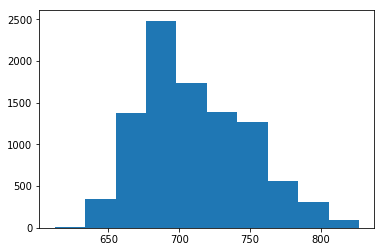

In [116]:
plt.hist(df_loan['fico'])

In [118]:
plt.figure(figsize=(10, 6))
df_loan[df_loan['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30)

0       737
1       707
2       682
3       712
4       667
5       727
6       667
7       722
8       682
9       707
10      677
11      662
12      767
13      747
14      727
15      702
16      672
17      797
18      712
19      667
20      772
21      797
22      662
23      782
24      672
25      712
26      802
27      662
28      772
29      812
       ... 
7680    682
7681    742
7682    702
7683    742
7684    692
7685    772
7686    717
7687    667
7688    777
7689    707
7690    752
7691    682
7692    712
7693    692
7694    692
7695    722
7696    722
7697    697
7698    717
7699    742
7700    677
7701    667
7702    662
7703    667
7704    702
7705    742
7706    697
7707    737
7708    717
7709    757
Name: fico, Length: 7710, dtype: int64